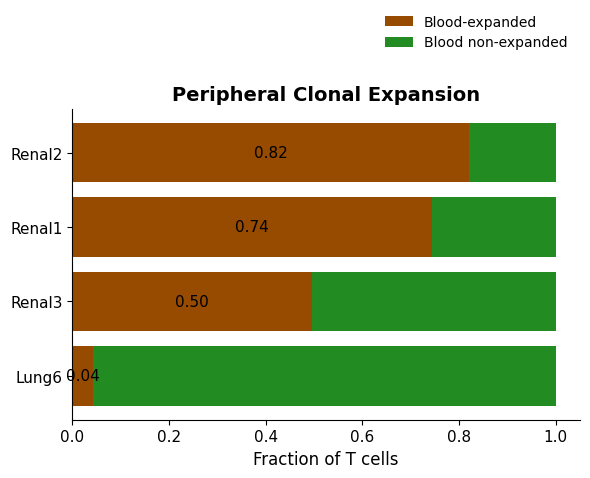

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Input Data ---
# Data extracted from Extended Data Fig. 2e.
# Cell counts for blood non-expanded and blood-expanded clones.
data = {
    'Patient': ['Renal2', 'Renal1', 'Renal3', 'Lung6'],
    'Non-Expanded Cells': [647, 602, 815, 3990],
    'Expanded Cells': [2956, 1746, 799, 178]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# --- 2. Calculate Fractions ---
# Calculate the total number of cells for normalization.
df['Total Cells'] = df['Non-Expanded Cells'] + df['Expanded Cells']

# Calculate the fraction for each category.
df['Fraction Expanded'] = df['Expanded Cells'] / df['Total Cells']
df['Fraction Non-Expanded'] = df['Non-Expanded Cells'] / df['Total Cells']


# --- 3. Plotting ---
# Define colors to match the paper's aesthetic
# (orange/yellow for expanded, blue/purple for non-expanded).
EXPANDED_COLOR = '#964B00'
NON_EXPANDED_COLOR = '#228B22'

# Create the figure and axes.
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the 'Expanded' fraction using barh.
ax.barh(df['Patient'], df['Fraction Expanded'],
        label='Blood-expanded', color=EXPANDED_COLOR)

# Plot the 'Non-Expanded' fraction, using 'left' to stack it horizontally.
ax.barh(df['Patient'], df['Fraction Non-Expanded'],
        left=df['Fraction Expanded'],
        label='Blood non-expanded', color=NON_EXPANDED_COLOR)

# --- 4. Add Annotations and Labels ---
# Add text labels showing the fraction value.
for index, row in df.iterrows():
    # Position text based on the bar's width (x-axis).
    text_x_position = row['Fraction Expanded'] / 2
    ax.text(text_x_position, index,
            f"{row['Fraction Expanded']:.2f}",
            ha='center', va='center', color='black', fontsize=11)

# Customize the plot for a horizontal layout.
ax.set_xlabel('Fraction of T cells', fontsize=12)
ax.set_title('Peripheral Clonal Expansion', fontsize=14, fontweight='bold')
ax.set_xlim(0, 1.05) # Set x-axis limit.
ax.invert_yaxis() # Invert y-axis to have 'Renal2' at the top.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='lower right', bbox_to_anchor=(1, 1.15), frameon=False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Display the plot.
plt.tight_layout()
plt.show()